# Global Health and Lifestyle Indicators by Country and Gender

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle, Rectangle, Arc
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

### From the World Health Organization's (WHO) Global Health Observatory, the following datasets were selected to explore lifestyle indicators and their correlation by country and gender

In [4]:
alcohol_df = pd.read_csv(r"C:\Users\aleec\Global_Health_Indicators\data\Alcohol, consumers past 12 months (age-standarized) (perc).csv")
tobacco_df = pd.read_csv(r"C:\Users\aleec\Global_Health_Indicators\data\Age-standardized estimates of current tobacco use, tobacco smoking and cigarette smoking.csv")
activity_df = pd.read_csv(r"C:\Users\aleec\Global_Health_Indicators\data\Prevalence of insufficient physical activity among adults aged 18 years (age-standardized estimate) (perc).csv")
overweight_df = pd.read_csv(r"C:\Users\aleec\Global_Health_Indicators\data\Prevalence of overweight among adults, BMI greater 25 (age-standardized estimate) (perc).csv")

# I. Exploratory Data Analysis (EDA)

In [9]:
alcohol_df.info()
tobacco_df.info()
activity_df.info()
overweight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  561 non-null    object 
 1   Period   561 non-null    int64  
 2   Sex      561 non-null    object 
 3   Value    546 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 17.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  495 non-null    object 
 1   Period   495 non-null    int64  
 2   Sex      495 non-null    object 
 3   Value    495 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  585 non-null    

In [49]:
print(f'Alcohol: {alcohol_df.isnull().sum()}')
print(f'Tobacco: {tobacco_df.isnull().sum()}')
print(f'Activity: {activity_df.isnull().sum()}')
print(f'Overweight: {overweight_df.isnull().sum()}')

Alcohol: Country     0
Period      0
Sex         0
Value      15
dtype: int64
Tobacco: Country    0
Period     0
Sex        0
Value      0
dtype: int64
Activity: Country    0
Period     0
Sex        0
Value      0
dtype: int64
Overweight: Country    0
Period     0
Sex        0
Value      0
dtype: int64


In [65]:
# Since 2016, there are no records for the following five countries. Even though alcohol is banned or highly regulated in some of these countries, they'll be removed to not fall in biased information.
alcohol_df[alcohol_df['Value'].isnull()]

,Country,Period,Sex,Value
321,Marshall Islands,2016,Both sexes,NaN
322,Marshall Islands,2016,Female,NaN
323,Marshall Islands,2016,Male,NaN
336,Monaco,2016,Both sexes,NaN
337,Monaco,2016,Female,NaN
338,Monaco,2016,Male,NaN
393,Palau,2016,Both sexes,NaN
394,Palau,2016,Female,NaN
395,Palau,2016,Male,NaN
447,San Marino,2016,Both sexes,NaN


In [67]:
alcohol_df.dropna(inplace=True)

In [69]:
print(alcohol_df.set_index('Country', inplace=True))
print(tobacco_df.set_index('Country', inplace=True))
print(activity_df.set_index('Country', inplace=True))
print(overweight_df.set_index('Country', inplace=True))

None
None
None
None


In [71]:
alcohol_df.drop('Period', axis=1, inplace=True)
tobacco_df.drop('Period', axis=1, inplace=True)
overweight_df.drop('Period', axis=1, inplace=True)
activity_df.drop('Period', axis=1, inplace=True)

## Alcohol dataset

In [73]:
alcohol_df.head(6)

,Sex,Value
Country,,
Afghanistan,Female,1.10
Afghanistan,Both sexes,2.06
Afghanistan,Male,3.01
Albania,Female,35.36
Albania,Both sexes,48.85
Albania,Male,62.46


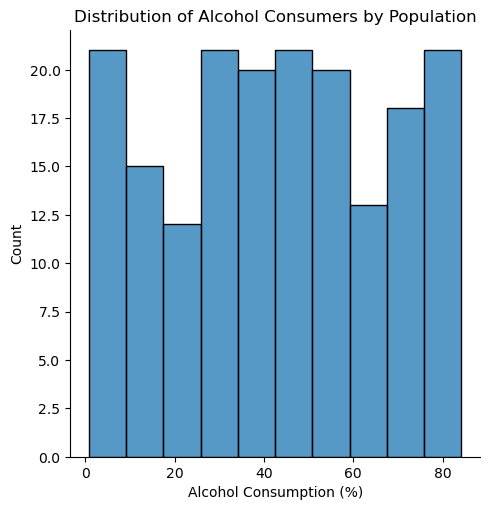

In [15]:
ax = sns.displot(alcohol_df[alcohol_df.Sex == 'Both sexes']['Value'], bins=10)
plt.title("Distribution of Alcohol Consumers by Population")
plt.xlabel("Alcohol Consumption (%)")
plt.show()

            Value              
             mean median    std
Sex                            
Both sexes  42.99  43.11  24.05
Female      35.12  33.22  22.99
Male        51.04  54.17  25.58


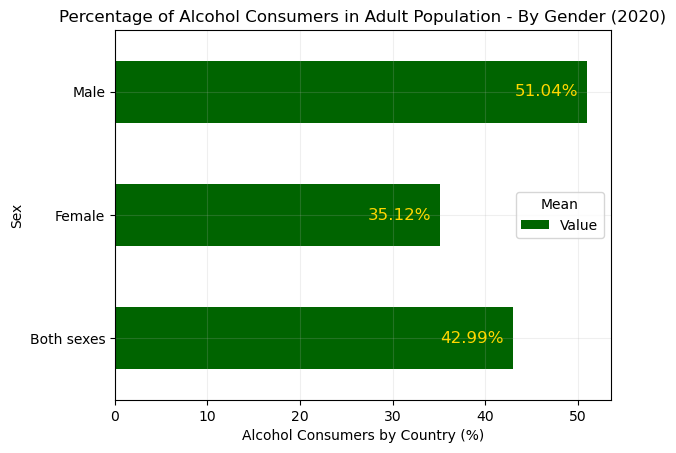

In [19]:
Gender_alcohol_users = alcohol_df.groupby('Sex').agg({'Value': ['mean', 'median', 'std']})
print(round(Gender_alcohol_users, 2))


ax = alcohol_df.groupby('Sex').agg({'Value': 'mean'}).plot(kind='barh',  #axes method 
                          title="Percentage of Alcohol Consumers in Adult Population - By Gender (2020)",
                          xlabel="Alcohol Consumers by Country (%)", color='darkgreen')

for bar in ax.patches:
    width = bar.get_width()  
    plt.text(width-1, # - 1 to plot inside the bar
             bar.get_y() + bar.get_height() / 2, # Align label to each bar
             s=f'{width:.2f}%', # Format two float digits
             va='center', ha='right', color='gold', fontsize='large') # Align label insides the bar

plt.legend(title='Mean', loc='center right') 
plt.grid(alpha=0.2) # Transparency 0-1
plt.show()

Country's alcohol consumers rank in 2020 by Gender

There's no signifficant difference in consumption by gender

In [78]:
more_alcohol_users = alcohol_df[alcohol_df['Sex']=='Both sexes'].sort_values('Value', ascending=False).head(10)
more_alcohol_users

,Sex,Value
Country,,
Luxembourg,Both sexes,84.20
Ireland,Both sexes,83.21
Andorra,Both sexes,82.51
Australia,Both sexes,80.67
New Zealand,Both sexes,80.28
Switzerland,Both sexes,79.96
Austria,Both sexes,79.40
Iceland,Both sexes,79.20
Germany,Both sexes,78.83


Index(['Luxembourg', 'Ireland', 'Andorra', 'Australia', 'New Zealand',
       'Switzerland', 'Austria', 'Iceland', 'Germany', 'Denmark'],
      dtype='object', name='Country')


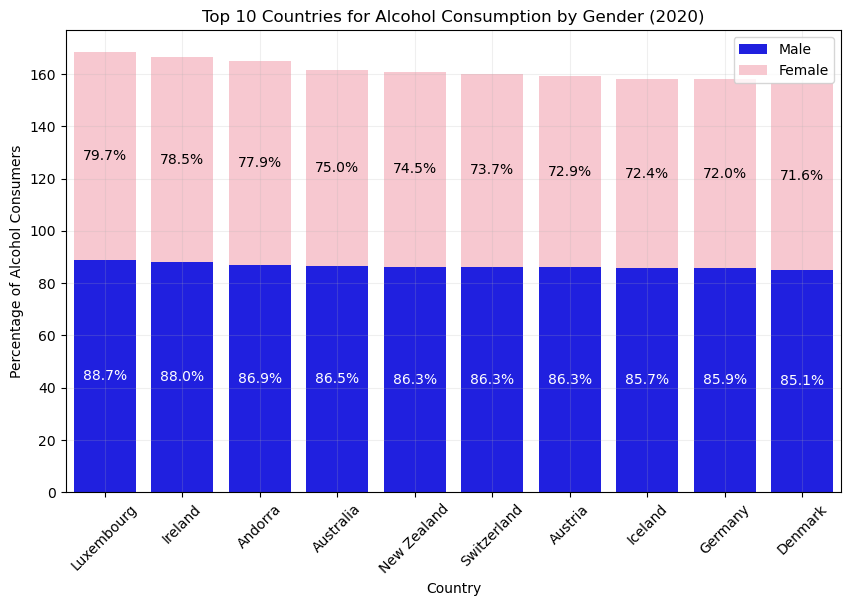

In [90]:
drinkers_gender = alcohol_df.groupby(['Country', 'Sex']).agg({'Value': 'sum'}).reset_index()
pivot_df = drinkers_gender.pivot(index='Country', columns='Sex', values='Value')

top_10_alcohol = pivot_df.sort_values(by='Both sexes', ascending=False).head(10)
print(top_10_alcohol.index)

top_10_alcohol_reset = top_10_alcohol.reset_index()

plt.figure(figsize=(10, 6))

bars1 = sns.barplot(x='Country', y='Male', data=top_10_alcohol_reset, color='blue', label='Male')
bars2 = sns.barplot(x='Country', y='Female', data=top_10_alcohol_reset, color='pink', label='Female', bottom=top_10_alcohol_reset['Male']) # Bottom to stack

plt.xlabel('Country')
plt.ylabel('Percentage of Alcohol Consumers')
plt.title('Top 10 Countries for Alcohol Consumption by Gender (2020)')
plt.xticks(rotation=45)
plt.legend()

for i, bar in enumerate(bars1.patches[:10]): # First 10 bars male
    height = bar.get_height()
    plt.annotate(f'{height:.1f}%', # Format two float digits
                 xy=(bar.get_x() + bar.get_width() / 2, height / 2),
                 ha='center', va='center', color='white')

for i, bar in enumerate(plt.gca().patches[10:]):  # Remaining bars Female
    height = bar.get_height()
    bottom = bar.get_y() + bar.get_height()  # bottom = top Male bars
    plt.annotate(f'{height:.1f}%', 
                 xy=(bar.get_x() + bar.get_width() / 2, bottom - height / 2),
                 ha='center', va='center', color='black', fontsize=10)

plt.grid(alpha=0.2)
plt.show()

Index(['Kuwait', 'Somalia', 'Comoros', 'Libya', 'Syrian Arab Republic',
       'Iran (Islamic Republic of)', 'Pakistan', 'Mauritania', 'Saudi Arabia',
       'Afghanistan'],
      dtype='object', name='Country')


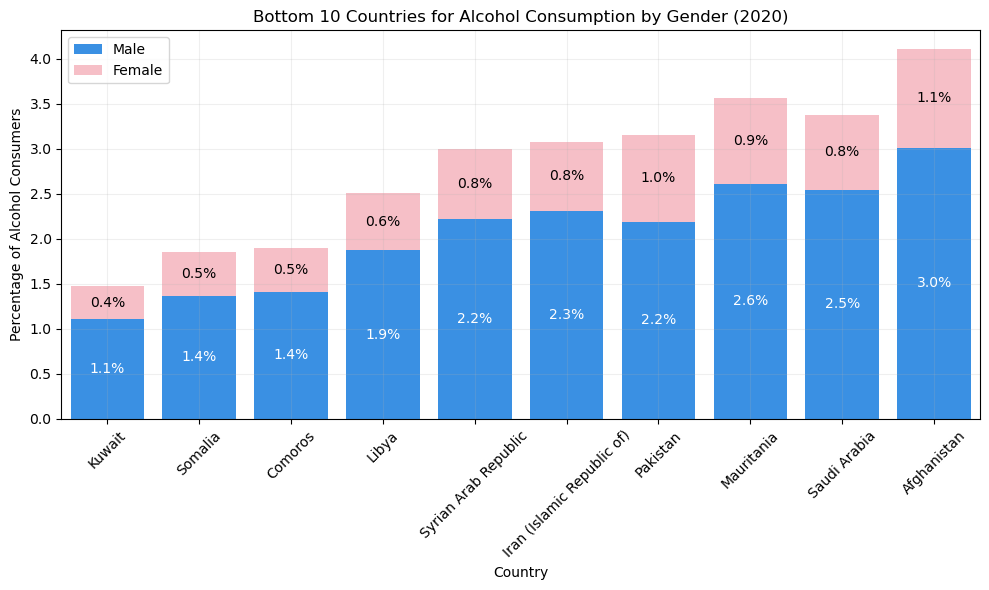

In [92]:
drinkers_gender = alcohol_df.groupby(['Country', 'Sex']).agg({'Value': 'sum'}).reset_index()
pivot_df = drinkers_gender.pivot(index='Country', columns='Sex', values='Value')
pivot_df

less_10_alcohol = pivot_df.sort_values(by='Both sexes', ascending=True).head(10)
print(less_10_alcohol.index)

less_10_alcohol_reset = less_10_alcohol.reset_index()

plt.figure(figsize=(10, 6))

bars1_2 = sns.barplot(x='Country', y='Male', data=less_10_alcohol_reset, color='dodgerblue', label='Male')
bars2_2 = sns.barplot(x='Country', y='Female', data=less_10_alcohol_reset, color='lightpink', label='Female', bottom=less_10_alcohol_reset['Male'])

plt.xlabel('Country')
plt.ylabel('Percentage of Alcohol Consumers')
plt.title('Bottom 10 Countries for Alcohol Consumption by Gender (2020)')
plt.xticks(rotation=45)
plt.legend()

for i, bar in enumerate(bars1_2.patches[:10]):
    height = bar.get_height()
    plt.annotate(f'{height:.1f}%', 
                 xy=(bar.get_x() + bar.get_width() / 2, height / 2),
                 ha='center', va='center', color='white')

for i, bar in enumerate(plt.gca().patches[10:]):  # Remaining bars correspond to Female percentages
    height = bar.get_height()
    bottom = bar.get_y() + bar.get_height()  # bottom is the top of the Male bar
    plt.annotate(f'{height:.1f}%', 
                 xy=(bar.get_x() + bar.get_width() / 2, bottom - height / 2),
                 ha='center', va='center', color='black', fontsize=10)

plt.tight_layout()
plt.grid(alpha=0.2)
plt.show()

## Results in Alcohol consumption are closely linked to cultural and religious contexts. 

    - At the top of the rank, high-income Western countries predominate. 
    - On the other hand, countries at the bottom of the rank, are predominantly Islamic countries, where alcohol consumption is often restricted or prohibited for religious and cultural reasons.

## Tobacco dataset

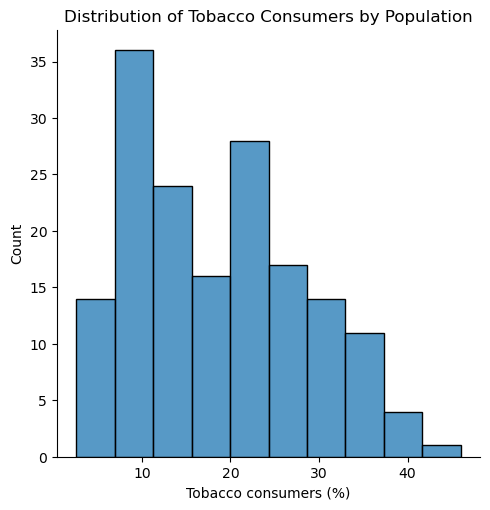

,Country,Period,Sex,Value
0,Afghanistan,2020,Male,17.1
1,Afghanistan,2020,Female,2.3
2,Afghanistan,2020,Both sexes,9.7


In [9]:
ax = sns.displot(tobacco_df[tobacco_df.Sex == 'Both sexes']['Value'], bins=10)
plt.title("Distribution of Tobacco Consumers by Population")
plt.xlabel("Tobacco consumers (%)")
plt.show()
tobacco_df.head(3)

            Value              
             mean median    std
Sex                            
Both sexes  18.84   17.6   9.83
Female       9.57    4.6  10.43
Male        28.09   26.9  13.18


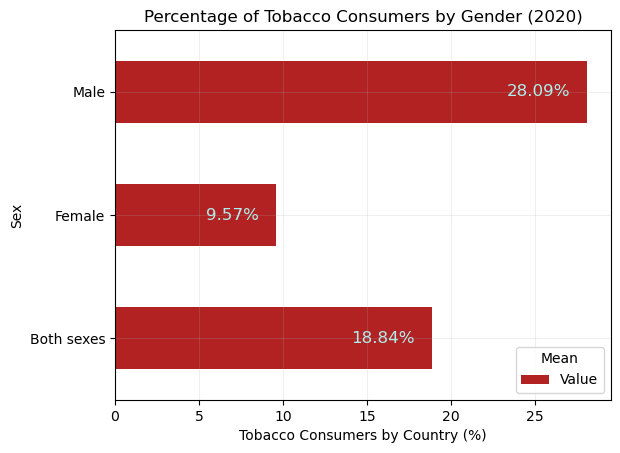

In [157]:
Gender_tobacco_users = tobacco_df.groupby('Sex').agg({'Value': ['mean', 'median', 'std']})
print(round(Gender_tobacco_users, 2))

ax = tobacco_df.groupby('Sex').agg({'Value': 'mean'}).plot(kind='barh',
                          title="Percentage of Tobacco Consumers by Gender (2020)",
                          xlabel="Tobacco Consumers by Country (%)", color='firebrick')

for bar in ax.patches:
    width = bar.get_width()  
    plt.text(width-1,
             bar.get_y() + bar.get_height() / 2,
             s=f'{width:.2f}%',
             va='center', ha='right', color='paleturquoise', fontsize='large')

plt.legend(title='Mean', loc='lower right')
plt.grid(alpha=0.2)
plt.show()

Index(['Nauru', 'Kiribati', 'Papua New Guinea', 'Serbia', 'Bulgaria',
       'Solomon Islands', 'Bosnia and Herzegovina', 'Croatia', 'Indonesia',
       'Andorra'],
      dtype='object', name='Country')


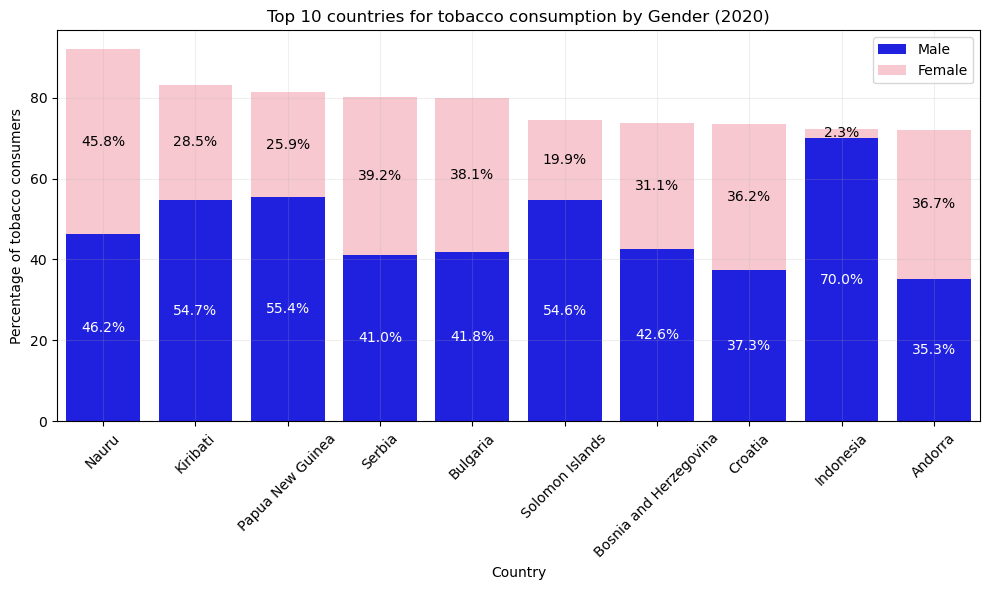

In [165]:
smookers_gender = tobacco_df.groupby(['Country', 'Sex']).agg({'Value': 'sum'}).reset_index()
pivot_tobacco = smookers_gender.pivot(index='Country', columns='Sex', values='Value')

top_10_tobacco = pivot_tobacco.sort_values(by='Both sexes', ascending=False).head(10)
print(top_10_tobacco.index)

top_10_tobacco_reset = top_10_tobacco.reset_index()

plt.figure(figsize=(10, 6))

bars1_tobacco = sns.barplot(x='Country', y='Male', data=top_10_tobacco_reset, color='blue', label='Male')
bars2_tobacco = sns.barplot(x='Country', y='Female', data=top_10_tobacco_reset, color='pink', label='Female', bottom=top_10_tobacco_reset['Male'])

plt.xlabel('Country')
plt.ylabel('Percentage of tobacco consumers')
plt.title('Top 10 countries for tobacco consumption by Gender (2020)')
plt.xticks(rotation=45)
plt.legend()

for i, bar in enumerate(bars1_tobacco.patches[:10]):
    height = bar.get_height()
    plt.annotate(f'{height:.1f}%', 
                 xy=(bar.get_x() + bar.get_width() / 2, height / 2),
                 ha='center', va='center', color='white')

for i, bar in enumerate(plt.gca().patches[10:]):
    height = bar.get_height()
    bottom = bar.get_y() + bar.get_height()
    plt.annotate(f'{height:.1f}%', 
                 xy=(bar.get_x() + bar.get_width() / 2, bottom - height / 2),
                 ha='center', va='center', color='black', fontsize=10)

plt.tight_layout()
plt.grid(alpha=0.2)
plt.show()

Index(['Ghana', 'Nigeria', 'Ethiopia', 'Benin', 'Cameroon', 'Panama',
       'Sao Tome and Principe', 'Togo', 'Turkmenistan', 'Niger'],
      dtype='object', name='Country')


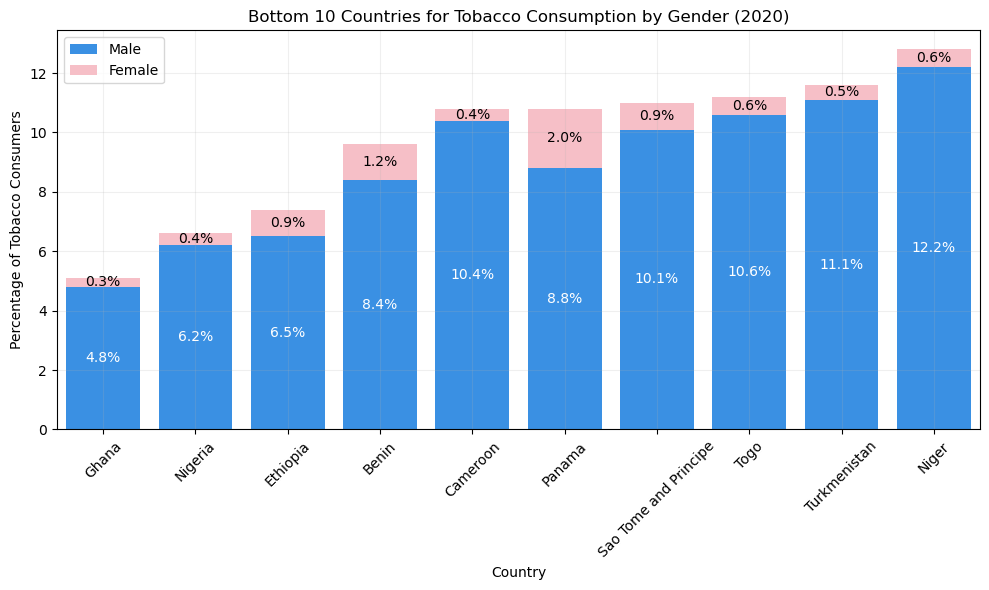

In [167]:
smookers_gender = tobacco_df.groupby(['Country', 'Sex']).agg({'Value': 'sum'}).reset_index()
pivot_tobacco = smookers_gender.pivot(index='Country', columns='Sex', values='Value')

less_10_tobacco = pivot_tobacco.sort_values(by='Both sexes', ascending=True).head(10)
print(less_10_tobacco.index)

less_10_tobacco_reset = less_10_tobacco.reset_index()

plt.figure(figsize=(10, 6))

bars1_tobacco_2 = sns.barplot(x='Country', y='Male', data=less_10_tobacco_reset, color='dodgerblue', label='Male')
bars2_tobacco_2 = sns.barplot(x='Country', y='Female', data=less_10_tobacco_reset, color='lightpink', label='Female', bottom=less_10_tobacco_reset['Male'])

plt.xlabel('Country')
plt.ylabel('Percentage of Tobacco Consumers')
plt.title('Bottom 10 Countries for Tobacco Consumption by Gender (2020)')
plt.xticks(rotation=45)
plt.legend()

for i, bar in enumerate(bars1_tobacco_2.patches[:10]):
    height = bar.get_height()
    plt.annotate(f'{height:.1f}%', 
                 xy=(bar.get_x() + bar.get_width() / 2, height / 2),
                 ha='center', va='center', color='white')

for i, bar in enumerate(plt.gca().patches[10:]):
    height = bar.get_height()
    bottom = bar.get_y() + bar.get_height()
    plt.annotate(f'{height:.1f}%', 
                 xy=(bar.get_x() + bar.get_width() / 2, bottom - height / 2),
                 ha='center', va='center', color='black', fontsize=10)

plt.tight_layout()
plt.grid(alpha=0.2)
plt.show()

## Tobacco consumption might be decreased due to regional regulations or decreased by the lack of it. Cultural acceptance and economic factors might be correlated, as well.3

## Prevalence of Insufficient Physical Activity dataset

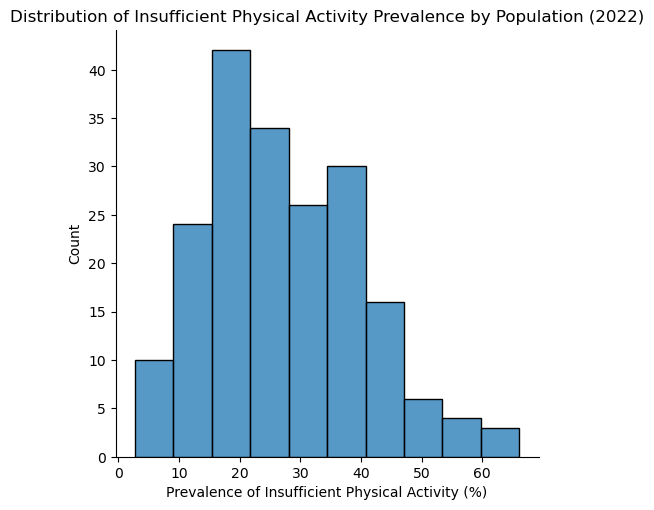

,Country,Period,Sex,Value
0,Afghanistan,2022,Male,20.02
1,Afghanistan,2022,Both sexes,33.36
2,Afghanistan,2022,Female,46.03


In [38]:
ax = sns.displot(activity_df[activity_df.Sex == 'Both sexes']['Value'], bins=10)
plt.title("Distribution of Insufficient Physical Activity Prevalence by Population (2022)")
plt.xlabel("Prevalence of Insufficient Physical Activity (%)")
plt.show()
activity_df.head(3)

            Value              
             mean median    std
Sex                            
Both sexes  27.30  25.42  12.84
Female      30.97  28.31  14.96
Male        23.57  21.51  11.48


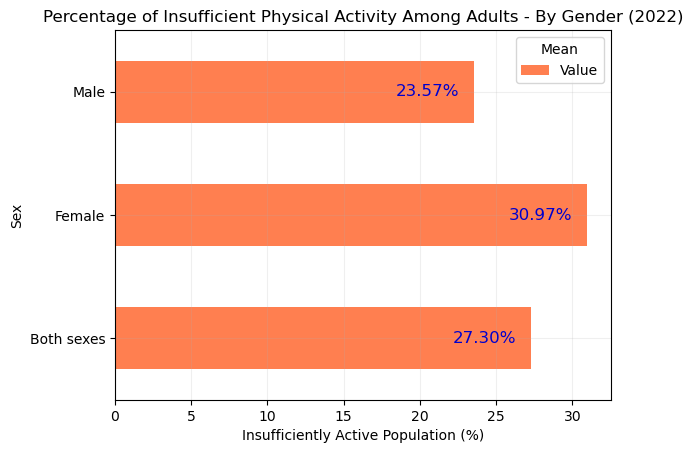

In [29]:
Gender_not_active = activity_df.groupby('Sex').agg({'Value': ['mean', 'median', 'std']})
print(round(Gender_not_active, 2))

ax = activity_df.groupby('Sex').agg({'Value': 'mean'}).plot(kind='barh',
                          title="Percentage of Insufficient Physical Activity Among Adults - By Gender (2022)",
                          xlabel="Insufficiently Active Population (%)", color='coral')

for bar in ax.patches:
    width = bar.get_width()  
    plt.text(width-1,
             bar.get_y() + bar.get_height() / 2,
             s=f'{width:.2f}%',
             va='center', ha='right', color='mediumblue', fontsize='large')

plt.legend(title='Mean', loc='upper right')
plt.grid(alpha=0.2)
plt.show()

Index(['Nauru', 'Kiribati', 'Papua New Guinea', 'Serbia', 'Bulgaria',
       'Solomon Islands', 'Bosnia and Herzegovina', 'Croatia', 'Indonesia',
       'Andorra'],
      dtype='object', name='Country')


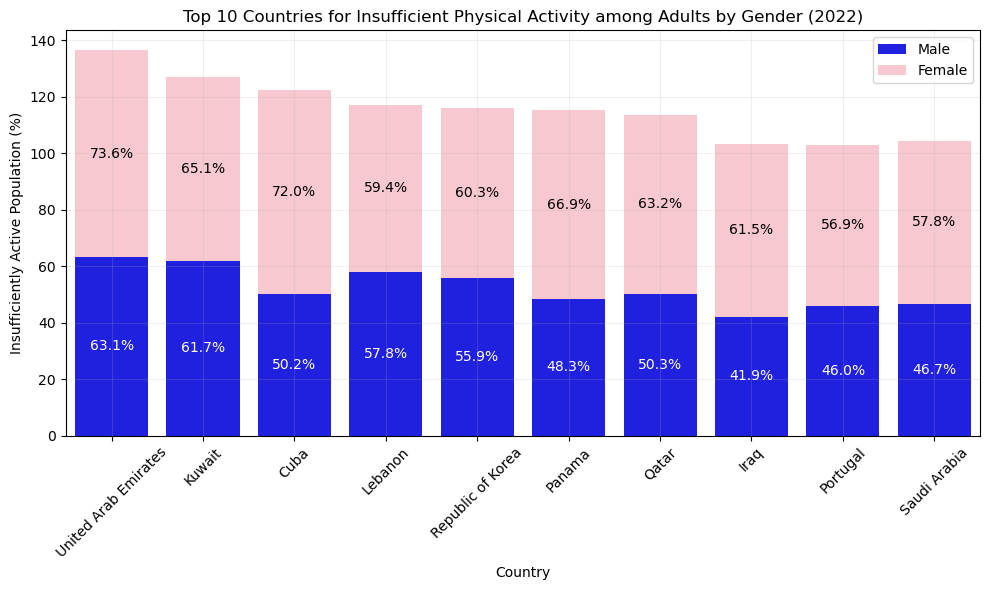

In [153]:
less_active_gender = activity_df.groupby(['Country', 'Sex']).agg({'Value': 'sum'}).reset_index()
pivot_less_active = less_active_gender.pivot(index='Country', columns='Sex', values='Value')

top_10_less_active = pivot_less_active.sort_values(by='Both sexes', ascending=False).head(10)
print(top_10_tobacco.index)

top_10_less_active_reset = top_10_less_active.reset_index()

plt.figure(figsize=(10, 6))

bars1_activity = sns.barplot(x='Country', y='Male', data=top_10_less_active_reset, color='blue', label='Male')
bars2_activity = sns.barplot(x='Country', y='Female', data=top_10_less_active_reset, color='pink', label='Female', bottom=top_10_less_active_reset['Male'])

plt.xlabel('Country')
plt.ylabel("Insufficiently Active Population (%)")
plt.title("Top 10 Countries for Insufficient Physical Activity among Adults by Gender (2022)")
plt.xticks(rotation=45)
plt.legend()

for i, bar in enumerate(bars1_activity.patches[:10]):
    height = bar.get_height()
    plt.annotate(f'{height:.1f}%', 
                 xy=(bar.get_x() + bar.get_width() / 2, height / 2),
                 ha='center', va='center', color='white')

for i, bar in enumerate(plt.gca().patches[10:]):
    height = bar.get_height()
    bottom = bar.get_y() + bar.get_height()
    plt.annotate(f'{height:.1f}%', 
                 xy=(bar.get_x() + bar.get_width() / 2, bottom - height / 2),
                 ha='center', va='center', color='black', fontsize=10)

plt.tight_layout()
plt.grid(alpha=0.2)
plt.show()

Index(['Malawi', 'United Republic of Tanzania', 'Uganda', 'Niue', 'Vanuatu',
       'Lesotho', 'Nepal', 'Sweden', 'Kenya', 'Rwanda'],
      dtype='object', name='Country')


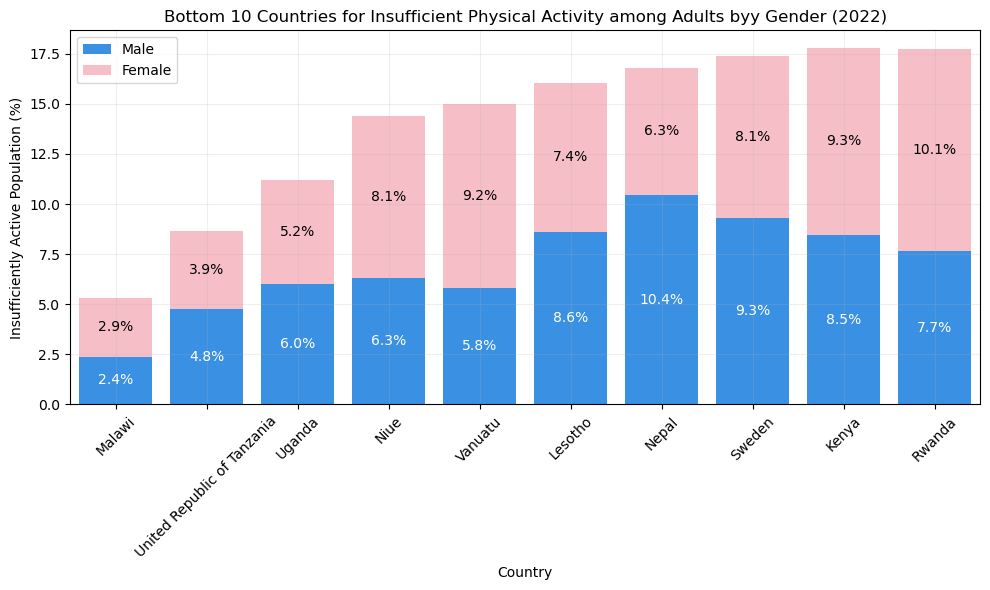

In [155]:
more_active_gender = activity_df.groupby(['Country', 'Sex']).agg({'Value': 'sum'}).reset_index()
pivot_more_active = more_active_gender.pivot(index='Country', columns='Sex', values='Value')

bottom_more_active = pivot_more_active.sort_values(by='Both sexes', ascending=True).head(10)
print(bottom_more_active.index)

bottom_more_active_reset = bottom_more_active.reset_index()

plt.figure(figsize=(10, 6))

bars1_activity_2 = sns.barplot(x='Country', y='Male', data=bottom_more_active_reset, color='dodgerblue', label='Male')
bars1_activity_2 = sns.barplot(x='Country', y='Female', data=bottom_more_active_reset, color='lightpink', label='Female', bottom=bottom_more_active_reset['Male'])

plt.xlabel('Country')
plt.ylabel("Insufficiently Active Population (%)")
plt.title("Bottom 10 Countries for Insufficient Physical Activity among Adults byy Gender (2022)")
plt.xticks(rotation=45)
plt.legend()

for i, bar in enumerate(bars1_activity_2.patches[:10]):
    height = bar.get_height()
    plt.annotate(f'{height:.1f}%', 
                 xy=(bar.get_x() + bar.get_width() / 2, height / 2),
                 ha='center', va='center', color='white')

for i, bar in enumerate(plt.gca().patches[10:]):
    height = bar.get_height()
    bottom = bar.get_y() + bar.get_height()
    plt.annotate(f'{height:.1f}%', 
                 xy=(bar.get_x() + bar.get_width() / 2, bottom - height / 2),
                 ha='center', va='center', color='black', fontsize=10)

plt.tight_layout()
plt.grid(alpha=0.2)
plt.show()

## Regarding physical activity, multiple factors could impact population habits, such as public health initiatives, lack of recreational public facilities, and cultural traditions likely to promote sedentarism.

Low-income countries often have populations that engage in manual labor, which can contribute to higher physical activity levels. However, Sweden's traditionally active urban environments can lead to less activity for some, but comprehensive public health policies promote active lifestyles.

##  Prevalence of Overweight Dataset

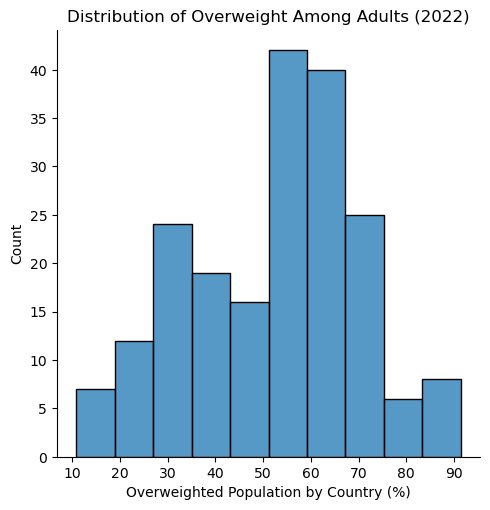

,Country,Period,Sex,Value
0,Afghanistan,2022,Male,44.07
1,Afghanistan,2022,Both sexes,48.57
2,Afghanistan,2022,Female,52.74


In [11]:
ax = sns.displot(overweight_df[overweight_df.Sex == 'Both sexes']['Value'], bins=10)
plt.title("Distribution of Overweight Among Adults by Ppopulation (2022)")
plt.xlabel("Overweighted Population by Country (%)")
plt.show()
overweight_df.head(3)

            Value              
             mean median    std
Sex                            
Both sexes  52.60  56.13  17.78
Female      54.53  55.06  17.95
Male        50.41  55.90  20.27


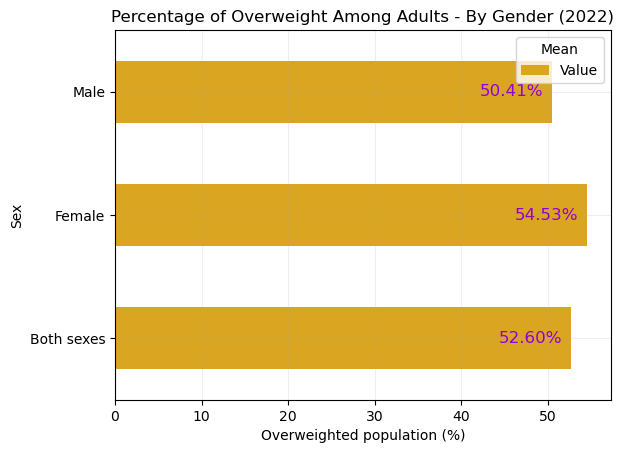

In [31]:
Gender_overweight = overweight_df.groupby('Sex').agg({'Value': ['mean', 'median', 'std']})
print(round(Gender_overweight, 2))

ax = overweight_df.groupby('Sex').agg({'Value': 'mean'}).plot(kind='barh',
                          title="Percentage of Overweight Among Adults by Gender (2022)",
                          xlabel="Overweighted population (%)", color='goldenrod')

for bar in ax.patches:
    width = bar.get_width()  
    plt.text(width-1,
             bar.get_y() + bar.get_height() / 2,
             s=f'{width:.2f}%',
             va='center', ha='right', color='darkviolet', fontsize='large')

plt.legend(title='Mean', loc='upper right')
plt.grid(alpha=0.2)
plt.show()

Index(['American Samoa', 'Tonga', 'Tokelau', 'Nauru', 'Niue', 'Cook Islands',
       'Samoa', 'Tuvalu', 'Kiribati', 'Chile'],
      dtype='object', name='Country')


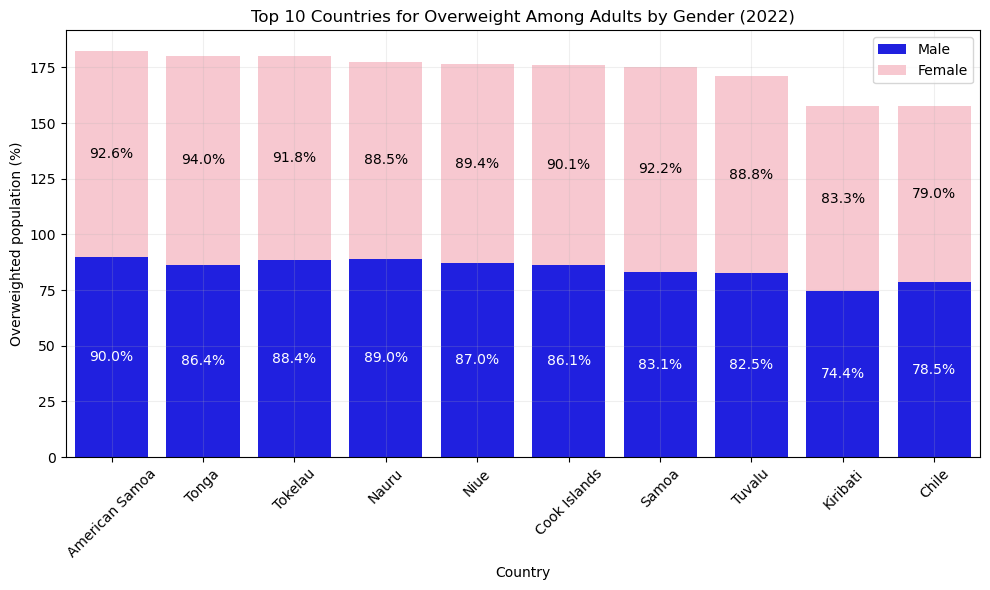

In [169]:
more_overweight_gender = overweight_df.groupby(['Country', 'Sex']).agg({'Value': 'sum'}).reset_index()
pivot_more_overweight = more_overweight_gender.pivot(index='Country', columns='Sex', values='Value')

top_10_more_overweight = pivot_more_overweight.sort_values(by='Both sexes', ascending=False).head(10)
print(top_10_more_overweight.index)

top_10_more_overweight_reset = top_10_more_overweight.reset_index()

plt.figure(figsize=(10, 6))

bars1_overweight = sns.barplot(x='Country', y='Male', data=top_10_more_overweight_reset, color='blue', label='Male')
bars2_overweight = sns.barplot(x='Country', y='Female', data=top_10_more_overweight_reset, color='pink', label='Female', bottom=top_10_more_overweight_reset['Male'])

plt.xlabel('Country')
plt.ylabel("Overweighted population (%)")
plt.title("Top 10 Countries for Overweight Among Adults by Gender (2022)")
plt.xticks(rotation=45)
plt.legend()

for i, bar in enumerate(bars1_overweight.patches[:10]):
    height = bar.get_height()
    plt.annotate(f'{height:.1f}%', 
                 xy=(bar.get_x() + bar.get_width() / 2, height / 2),
                 ha='center', va='center', color='white')

for i, bar in enumerate(plt.gca().patches[10:]):
    height = bar.get_height()
    bottom = bar.get_y() + bar.get_height()
    plt.annotate(f'{height:.1f}%', 
                 xy=(bar.get_x() + bar.get_width() / 2, bottom - height / 2),
                 ha='center', va='center', color='black', fontsize=10)

plt.tight_layout()
plt.grid(alpha=0.2)
plt.show()

Index(['Ethiopia', 'Timor-Leste', 'Burundi', 'Madagascar', 'Eritrea', 'Niger',
       'Viet Nam', 'Rwanda', 'Chad', 'Burkina Faso'],
      dtype='object', name='Country')


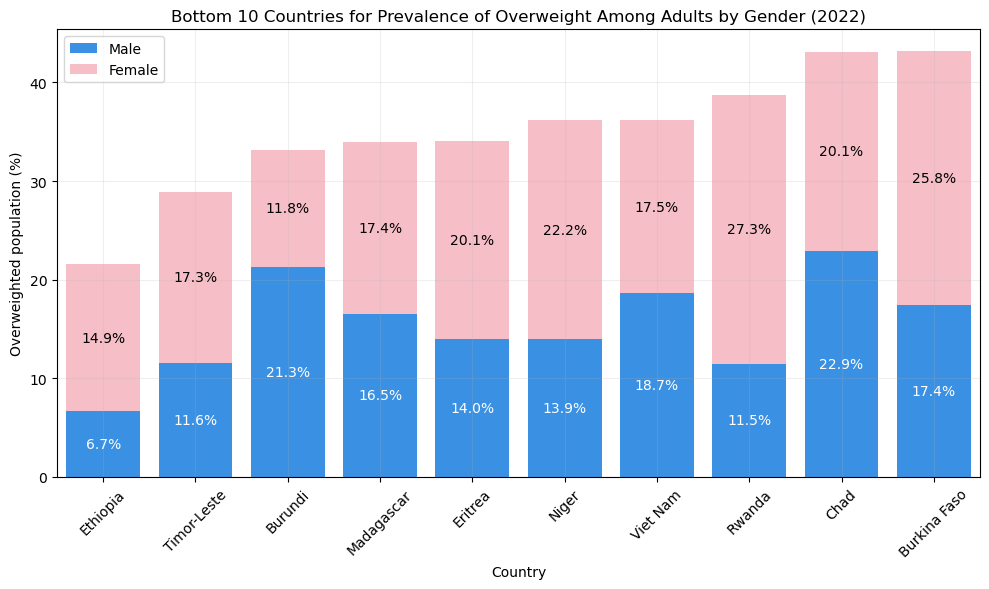

In [171]:
less_overweight_gender = overweight_df.groupby(['Country', 'Sex']).agg({'Value': 'sum'}).reset_index()
pivot_less_overweight = less_overweight_gender.pivot(index='Country', columns='Sex', values='Value')

bottom_less_overweight = pivot_less_overweight.sort_values(by='Both sexes', ascending=True).head(10)
print(bottom_less_overweight.index)

bottom_less_overweight_reset = bottom_less_overweight.reset_index()

plt.figure(figsize=(10, 6))

bars1_overweight_2 = sns.barplot(x='Country', y='Male', data=bottom_less_overweight_reset, color='dodgerblue', label='Male')
bars1_overweight_2 = sns.barplot(x='Country', y='Female', data=bottom_less_overweight_reset, color='lightpink', label='Female', bottom=bottom_less_overweight_reset['Male'])

plt.xlabel('Country')
plt.ylabel("Overweighted population (%)")
plt.title("Bottom 10 Countries for Prevalence of Overweight Among Adults by Gender (2022)")
plt.xticks(rotation=45)
plt.legend()

for i, bar in enumerate(bars1_overweight_2.patches[:10]):
    height = bar.get_height()
    plt.annotate(f'{height:.1f}%', 
                 xy=(bar.get_x() + bar.get_width() / 2, height / 2),
                 ha='center', va='center', color='white')

for i, bar in enumerate(plt.gca().patches[10:]):
    height = bar.get_height()
    bottom = bar.get_y() + bar.get_height()
    plt.annotate(f'{height:.1f}%', 
                 xy=(bar.get_x() + bar.get_width() / 2, bottom - height / 2),
                 ha='center', va='center', color='black', fontsize=10)

plt.tight_layout()
plt.grid(alpha=0.2)
plt.show()

## We could conclude dietary habits determine whether a country has more or less overweighted people.

### Once again, results may suggest, the impact of cultural and economic factors on weight rates. 
    - Many Pacific Island nations like American Samoa, Tonga, Nauru, and Kiribati have diets high in processed foods and imported products, contributing to higher obesity rates. In addition, there may be less stigma associated with being overweight, which can affect social perceptions of body image and health.
    - Chile has also experienced rising obesity rates due to changes in dietary habits, urbanization, and the availability of fast food.
    - Lacking access to processed foods may contribute to lower overweight rates or increase as long as availability does so.

# II. Hypothesis Testing

### Alcohol Hypotheses:
$Null Hypothesis (H₀):$ Males' alcohol consumption = Females'
  
$Alternative Hypothesis (Hₐ):$ Males' alcohol consumption > Females'

In [9]:
# Z-test formula for two proportions (Right-tailed Test)
n_males = alcohol_df[alcohol_df.Sex == 'Male'].shape[0]  
n_females = alcohol_df[alcohol_df.Sex == 'Female'].shape[0]
success_males = alcohol_df[alcohol_df['Sex'] == 'Male']['Value'].mean()
success_females = alcohol_df[alcohol_df['Sex'] == 'Female']['Value'].mean() 

# Sample proportions
p̂_males = success_males / n_males
p̂_females = success_females / n_females

# Pooled proportion
p_pooled = (success_males + success_females) / (n_males + n_females)

# Standard error
se = np.sqrt(p_pooled * (1 - p_pooled) * ((1 / n_males) + (1 / n_females)))

# z-test statistic
z = (p̂_males - p̂_females) / se

# p-value (two-tailed test)
p_value = 1 - stats.norm.cdf(abs(z))
print(f"Z value: {z}")
print(f"P-value: {p_value}")

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: Males consume more alcohol than females.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in alcohol consumption between males and females.")


Z value: 1.9538882628769971
P-value: 0.025357216466058152
Reject the null hypothesis: Males consume more alcohol than females.


### Tobacco Hypotheses:
$Null Hypothesis (H₀):$ Males' tobacco consumption = Females'
  
$Alternative Hypothesis (Hₐ):$ Males' tobacco consumption > Females'

In [11]:
# Z-test formula for two proportions (Right-tailed Test)
n_males_tobacco = tobacco_df[tobacco_df.Sex == 'Male'].shape[0]  
n_females_tobacco = tobacco_df[tobacco_df.Sex == 'Female'].shape[0]
success_males_tobacco = tobacco_df[tobacco_df['Sex'] == 'Male']['Value'].mean()
success_females_tobacco = tobacco_df[tobacco_df['Sex'] == 'Female']['Value'].mean() 

# Sample proportions
p̂_males_tobacco = success_males_tobacco / n_males_tobacco
p̂_females_tobacco = success_females_tobacco / n_females_tobacco

# Pooled proportion
p_pooled_tobacco = (success_males + success_females) / (n_males_tobacco + n_females_tobacco)

# Standard error
se_tobacco = np.sqrt(p_pooled_tobacco * (1 - p_pooled_tobacco) * ((1 / n_males_tobacco) + (1 / n_females_tobacco)))

# z-test statistic
z_tobacco = (p̂_males_tobacco - p̂_females_tobacco) / se_tobacco

# p-value (two-tailed test)
p_value_tobacco = 1 - stats.norm.cdf(abs(z_tobacco))
print(f"Z value: {z_tobacco}")
print(f"P-value: {p_value_tobacco}")

# Conclusion
if p_value_tobacco < 0.05:
    print("Reject the null hypothesis: Males consume more tobacco than females.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in tobacco consumption between males and females.")


Z value: 2.320947312298146
P-value: 0.010144843811244919
Reject the null hypothesis: Males consume more tobacco than females.


### Physical Activity Hypotheses:
$Null Hypothesis (H₀):$ Females' prevalence of insufficient physical activity = Males'
  
$Alternative Hypothesis (Hₐ):$ Females' prevalence of insufficient physical activity > Males'

In [506]:
# Z-test formula for two proportions (Right-tailed Test)
n_females_activity = activity_df[activity_df['Sex'] == 'Female'].shape[0]
n_males_activity = activity_df[activity_df['Sex'] == 'Male'].shape[0]

success_females_activity = activity_df[activity_df['Sex'] == 'Female']['Value'].mean()
success_males_activity = activity_df[activity_df['Sex'] == 'Male']['Value'].mean()

# Sample proportions
p̂_females_activity = success_females_activity / n_females_activity
p̂_males_activity = success_males_activity / n_males_activity

# Pooled proportion
p_pooled_activity = (success_females_activity + success_males_activity) / (n_females_activity + n_males_activity)

# Standard error
se_activity = np.sqrt(p_pooled_activity * (1 - p_pooled_activity) * ((1 / n_females_activity) + (1 / n_males_activity)))

# z-test statistic
z_activity = (p̂_females_activity - p̂_males_activity) / se_activity

# p-value (Right-tailed test)
p_value_activity = 1 - stats.norm.cdf(z_activity)
print(f"Z value: {z_activity}")
print(f"P-value: {p_value_activity}")

# Conclusion
if p_value_activity < 0.05:
    print("Reject the null hypothesis: Females have more prevalence of insufficient physical activity than males.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in physical activity prevalence between females and males.")


Z value: 1.081189639740694
P-value: 0.1398063827865368
Fail to reject the null hypothesis: There is no significant difference in physical activity prevalence between females and males.


### Overweight Hypotheses:
$Null Hypothesis (H₀):$ Females' prevalence of overweight = Males'
  
$Alternative Hypothesis (Hₐ):$ Females' prevalence of overweight > Males'

In [13]:
# Z-test formula for two proportions (Right-tailed Test)
n_females_overweight = overweight_df[overweight_df['Sex'] == 'Female'].shape[0]
n_males_overweight = overweight_df[overweight_df['Sex'] == 'Male'].shape[0]

success_females_overweight = overweight_df[overweight_df['Sex'] == 'Female']['Value'].mean()
success_males_overweight = overweight_df[overweight_df['Sex'] == 'Male']['Value'].mean()

# Sample proportions
p̂_females_overweight = success_females_overweight / n_females_overweight
p̂_males_overweight = success_males_overweight / n_males_overweight

# Pooled proportion
p_pooled_overweight = (success_females_overweight + success_males_overweight) / (n_females_overweight+ n_males_overweight)

# Standard error
se_overweight = np.sqrt(p_pooled_overweight * (1 - p_pooled_overweight) * ((1 / n_females_overweight) + (1 / n_males_overweight)))

# z-test statistic
z_overweight = (p̂_females_overweight - p̂_males_overweight) / se_overweight

# p-value (one-tailed test)
p_value_overweight = 1 - stats.norm.cdf(abs(z_overweight))
print(f"Z value: {z_overweight}")
print(f"P-value: {p_value_overweight}")

# Conclusion
if p_value_overweight < 0.05:
    print("Reject the null hypothesis: Females have more prevalence of overweight than Males.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in overweight prevalence between females and males.")


Z value: 0.4694562815294669
P-value: 0.3193717636000796
Fail to reject the null hypothesis: There is no significant difference in overweight prevalence between females and males.


### Overweight and Physical Activity Hypotheses:
$Null Hypothesis (H₀):$ There is no correlation between the prevalence of insufficient physical activity and the prevalence of overweight in countries.

$Alternative Hypothesis (Hₐ):$ Countries with more insufficient physical activity have a higher prevalence of overweight.

In [135]:
# Merge to analyze the relationship
merged_df = pd.merge(activity_df, overweight_df, on='Country', suffixes=('_activity', '_overweight'))

mean_activity = merged_df.groupby('Country')['Value_activity'].mean()
mean_overweight = merged_df.groupby('Country')['Value_overweight'].mean()

# new df to store mean values
mean_df = pd.DataFrame({
    'Mean_Activity': mean_activity,
    'Mean_Overweight': mean_overweight
}).reset_index()
print(mean_df.sort_values('Mean_Overweight', ascending=False).head(10))

# Sample sizes
n_countries = mean_df.shape[0]

# Success counts for activity and overweight
success_activity = mean_df['Mean_Activity'].mean()
success_overweight = mean_df['Mean_Overweight'].mean()

# Sample proportions
p̂_activity = success_activity / n_countries
p̂_overweight = success_overweight / n_countries

# Pooled proportion
p_pooled = (success_activity + success_overweight) / (n_countries + n_countries)

# Standard error
se_merged = np.sqrt(p_pooled * (1 - p_pooled) * ((1 / n_countries) + (1 / n_countries)))

# z-test statistic
z_merged = (p̂_overweight - p̂_activity) / se_merged

# p-value (Right-tailed test)
p_value_merged = 1 - stats.norm.cdf(z_merged)
print(f"Z value: {z_merged}")
print(f"P-value: {p_value_merged}")

# Conclusion for Hypothesis 1
if p_value_merged < 0.05:
    print("Reject the null hypothesis: Countries with more insufficient physical activity have more prevalence of overweight.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between insufficient physical activity and prevalence of overweight.")

          Country  Mean_Activity  Mean_Overweight
173         Tonga      30.446667        90.253333
118         Nauru      35.376667        88.783333
125          Niue       7.253333        88.286667
39   Cook Islands      24.956667        88.160000
148         Samoa      13.456667        87.653333
178        Tuvalu      24.483333        85.696667
90       Kiribati      31.426667        78.946667
34          Chile      38.180000        78.766667
91         Kuwait      63.400000        78.013333
139         Qatar      55.646667        76.566667
Z value: 3.1028757617213434
P-value: 0.0009582503844743906
Reject the null hypothesis: Countries with more insufficient physical activity have more prevalence of overweight.


## III. Correlation Testing

### Alcohol Consumption and Overweight Prevalence

Spearman Correlation: 0.08376211764865812
                  Value_alcohol  Value_overweight
Value_alcohol          1.000000          0.103894
Value_overweight       0.103894          1.000000


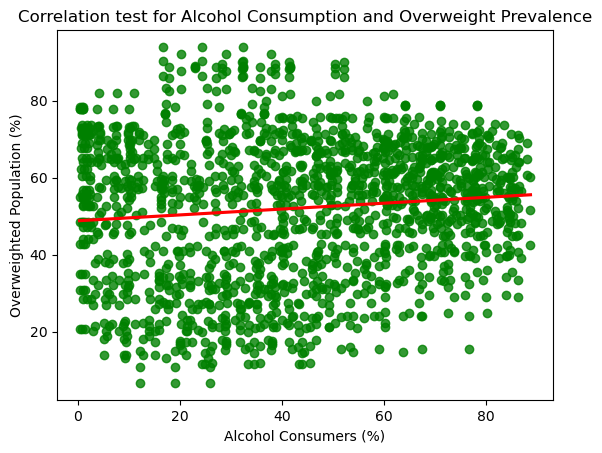

In [173]:
# Alcohol_df and overweight_df are not normally distribuited
merged_df_Alc_Ovw = pd.merge(alcohol_df, overweight_df, on='Country', suffixes=('_alcohol', '_overweight'))

spearman_corr = merged_df_Alc_Ovw['Value_alcohol'].corr(merged_df_Alc_Ovw['Value_overweight'], method='spearman')
print(f"Spearman Correlation: {spearman_corr}")

corr_matrix = merged_df_Alc_Ovw[['Value_alcohol', 'Value_overweight']].corr()
print(corr_matrix)

sns.regplot(x=merged_df_Alc_Ovw['Value_alcohol'], y=merged_df_Alc_Ovw['Value_overweight'], ci=False, color='green', line_kws={'color':'red'});
plt.title('Correlation test for Alcohol Consumption and Overweight Prevalence')
plt.xlabel('Alcohol Consumers (%)')
plt.ylabel('Overweighted Population (%)')
plt.show()

The Spearman correlation coefficient of 0.0838 indicates a very weak positive correlation between alcohol consumption and overweight prevalence among countries, suggesting that there is almost no significant relationship between these two variables

### Alcohol Consumption vs Tobacco Consumption

Spearman Correlation: 0.25086253974727624
               Value_alcohol  Value_tobacco
Value_alcohol       1.000000       0.186965
Value_tobacco       0.186965       1.000000


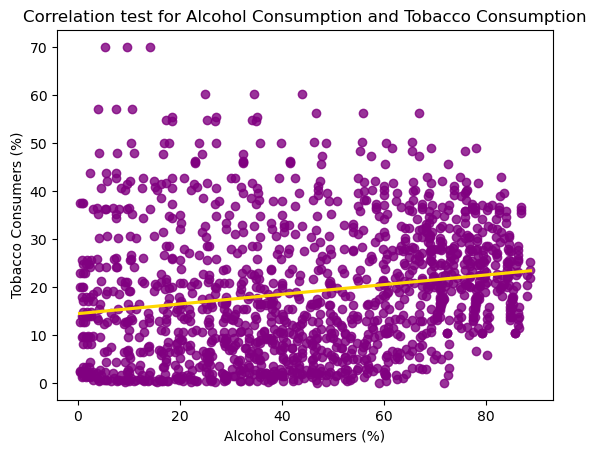

In [175]:
# Alcohol Consumption vs. Tobacco Consumption
merged_df_Alc_tob = pd.merge(alcohol_df, tobacco_df, on='Country', suffixes=('_alcohol', '_tobacco'))

spearman_corr_subst = merged_df_Alc_tob['Value_alcohol'].corr(merged_df_Alc_tob['Value_tobacco'], method='spearman')
print(f"Spearman Correlation: {spearman_corr_subst}")

corr_matrix_subst = merged_df_Alc_tob[['Value_alcohol', 'Value_tobacco']].corr()
print(corr_matrix_subst)

sns.regplot(x=merged_df_Alc_tob['Value_alcohol'], y=merged_df_Alc_tob['Value_tobacco'], ci=False, color='purple', line_kws={'color':'gold'});
plt.title('Correlation test for Alcohol Consumption and Tobacco Consumption')
plt.xlabel('Alcohol Consumers (%)')
plt.ylabel('Tobacco Consumers (%)')

plt.show()

The Spearman correlation coefficient of 0.2509 indicates a moderate positive correlation between alcohol consumption and tobacco consumption. 
While this correlation is not very strong, it is significant enough to suggest a potential relationship.

## IV. Interpretation & Real-World Application

**Why is this information relevant?**

Understanding human behavioral trends is essential for both public and private sector organizations. By identifying behavior patterns, public institutions can more effectively target specific health issues and develop initiatives to improve population well-being.

For private companies, refined consumer profiles based on health behavior can help tailor products and services to better serve their audiences, whether profit-driven or non-profit. This research aims to encourage social initiatives geared towards fostering community health and development.

### Key Insights

- **Alcohol Consumption:** Patterns in alcohol consumption are closely associated with cultural and religious contexts, as well as social norms.


- **Tobacco Consumption:** Tobacco usage is influenced by regional regulations and cultural acceptance, with economic factors also playing a significant role.


- **Physical Activity:** Levels of physical activity may be shaped by factors such as public health initiatives, availability of recreational facilities, and cultural traditions, with some societies exhibiting higher rates of sedentary behavior.


- **Overweight Prevalence:** Dietary habits appear to be a primary determinant of overweight prevalence in different countries. Cultural and economic factors likely have a significant impact on these patterns.

### Conclusion

This analysis suggests that health indicators like alcohol and tobacco use, physical activity, and overweight prevalence are strongly influenced by cultural, economic, and regulatory factors. Recognizing these patterns can provide insights into designing more effective health policies and tailored social programs that promote healthier lifestyle choices on a global scale.


### Sources

Datasets: World Health Organization, The Global Health Observatory, Indicators. Retrieve from:
https://www.who.int/data/gho/data/indicators

Wikipedia, (2024) "Religious Composition by Country, in Percentages'". Pew Research. 18 December 2012. Retrieve from: https://www.pewforum.org/2012/12/18/table-religious-composition-by-country-in-percentages/
